In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

read the files:

In [14]:
df = pd.read_csv("athlete_events.csv")
df_countries_codes = pd.read_csv("noc_regions.csv")
df.dropna(subset=["Height","Weight"],inplace=True)
# because we work with BMI we will need people who have BMI(not nan in these 2 columns)
df.rename(columns={"Name":"Player"})


#add bmi column
# BMI = mass / height^2(meters)
df["bmi"] = df["Weight"] // (df["Height"] / 100)**2
df["bmi"] = df["bmi"].astype(int)


#add region column
country_code = df_countries_codes.set_index("NOC").to_dict()["region"]
df["region"] = df["NOC"]
df.replace({"region":country_code},inplace=True)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,bmi,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20,China
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,23,Netherlands
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,23,Netherlands
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,23,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,27,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,19,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,19,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,28,Poland


add bmi status by world dictionary


In [22]:
weight_status = {range(0, 18): "underweight",range(18, 25): "healthy weight",range(25,40): "overweight",range(40, 100):'Obesity'}
weight_status_ticks = {18:"underweight",25:"healthy weight",30:"overweight",40:"Obesity"}
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'bmi', 'region'],
      dtype='object')

check  bmi:

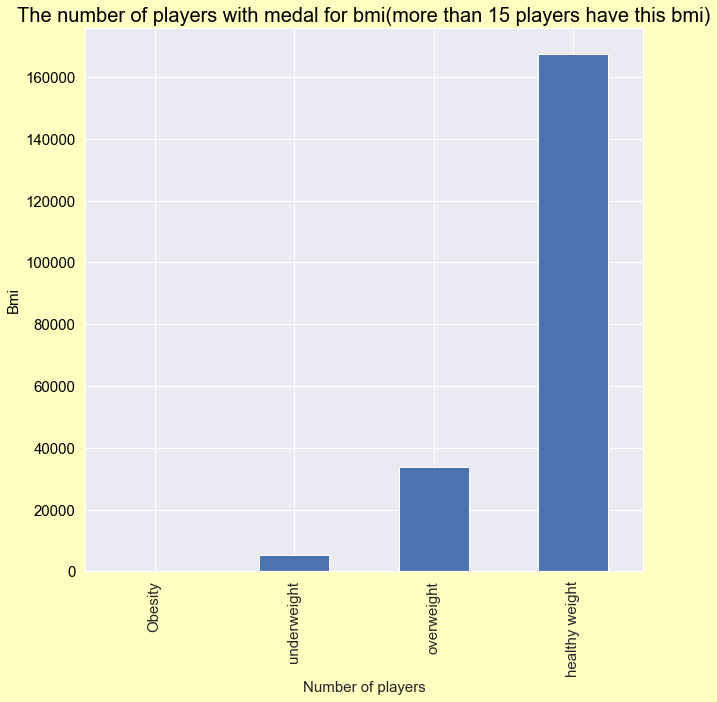

In [29]:

bmi_cols_Medal =  df.copy()
bmi_cols_Medal.dropna(inplace=True)
# drop those who dont have medal


bmi = df.replace({"bmi":weight_status})
bmi = bmi["bmi"].value_counts().sort_values()
bmi= bmi.loc[bmi.values > 15]


fig = plt.figure()
fig.patch.set_facecolor('xkcd:cream')
bmi.plot(kind = "bar", figsize =(10,10))
#costumize the graph
plt.xlabel('Number of players',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(color = "black",fontsize = 15)
plt.ylabel("Bmi",color="black",fontsize = 15)
plt.title('The number of players with medal for bmi(more than 15 players have this bmi)',color="black",fontsize = 20)
plt.show()


function for building graph per topic and aerage

In [30]:
def avg_value_per_topic(data_name_x_axis,data_name_y_axis,data,adding_to_title):
    #using the data
    pivot_topic_avg = pd.pivot_table(data=data, index=data_name_x_axis)
    topic_avg_list = list(pivot_topic_avg.index.values)
    column_avg_list = list(pivot_topic_avg[data_name_y_axis])
    ylabels =list(weight_status_ticks.values())
    yticks = list(weight_status_ticks.keys())

    #making the plot
    sns.set(rc = {'figure.figsize':(20,15)})
    sns.set(font_scale = 2)
    plot = sns.barplot(x= topic_avg_list, y = column_avg_list)
    plt.yticks(yticks,ylabels)
    plot.set(xlabel=data_name_x_axis, ylabel = data_name_y_axis)
    plot.set_title("avg {} per {} {}".format(data_name_y_axis, data_name_x_axis,adding_to_title), fontsize = 40)
    


the bmi in judo by years

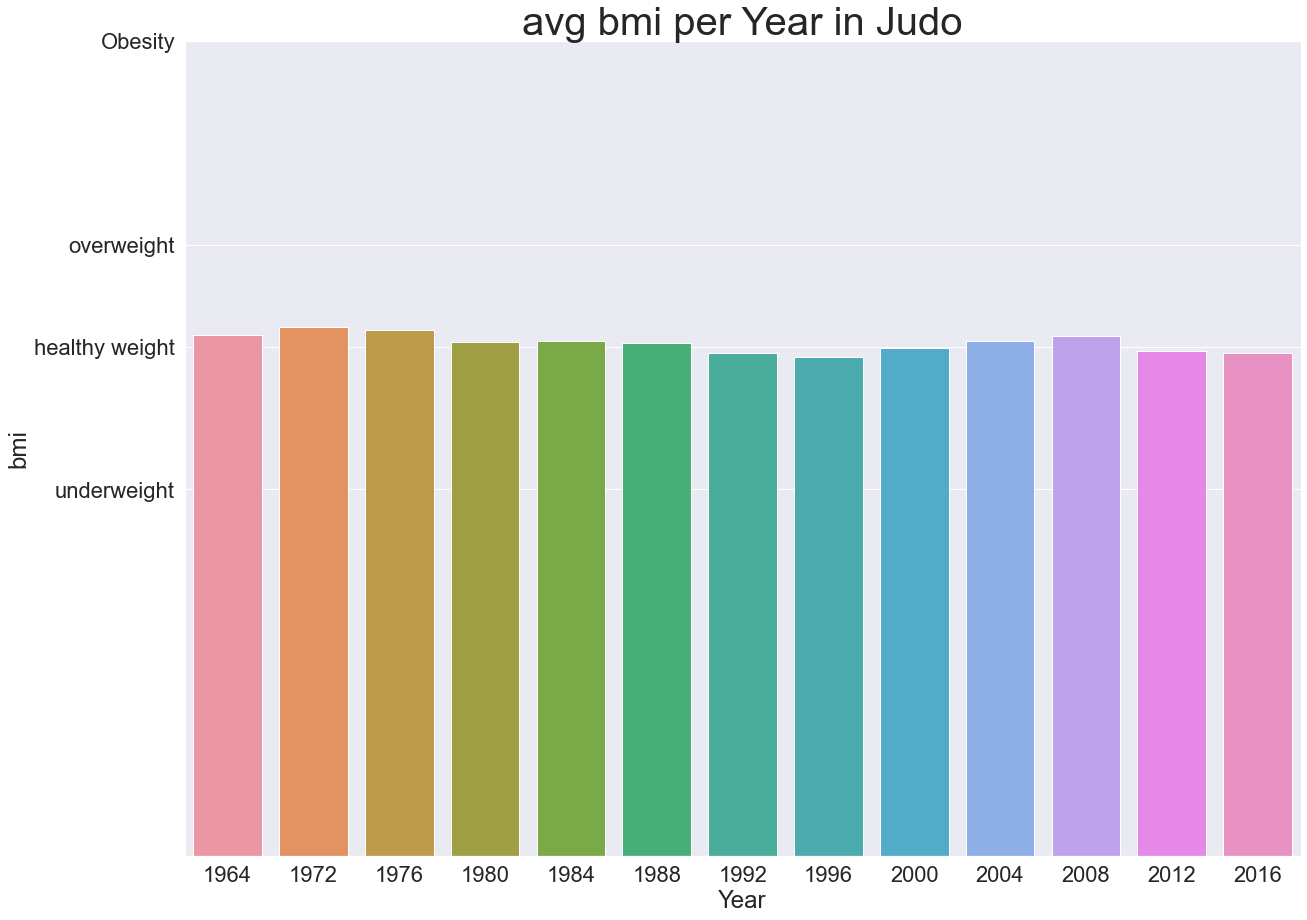

In [31]:
bmi_judo_players = df.rename(columns={"Name":"Player"}).loc[df["Sport"] == "Judo"]
avg_value_per_topic("Year","bmi",bmi_judo_players,"in Judo")

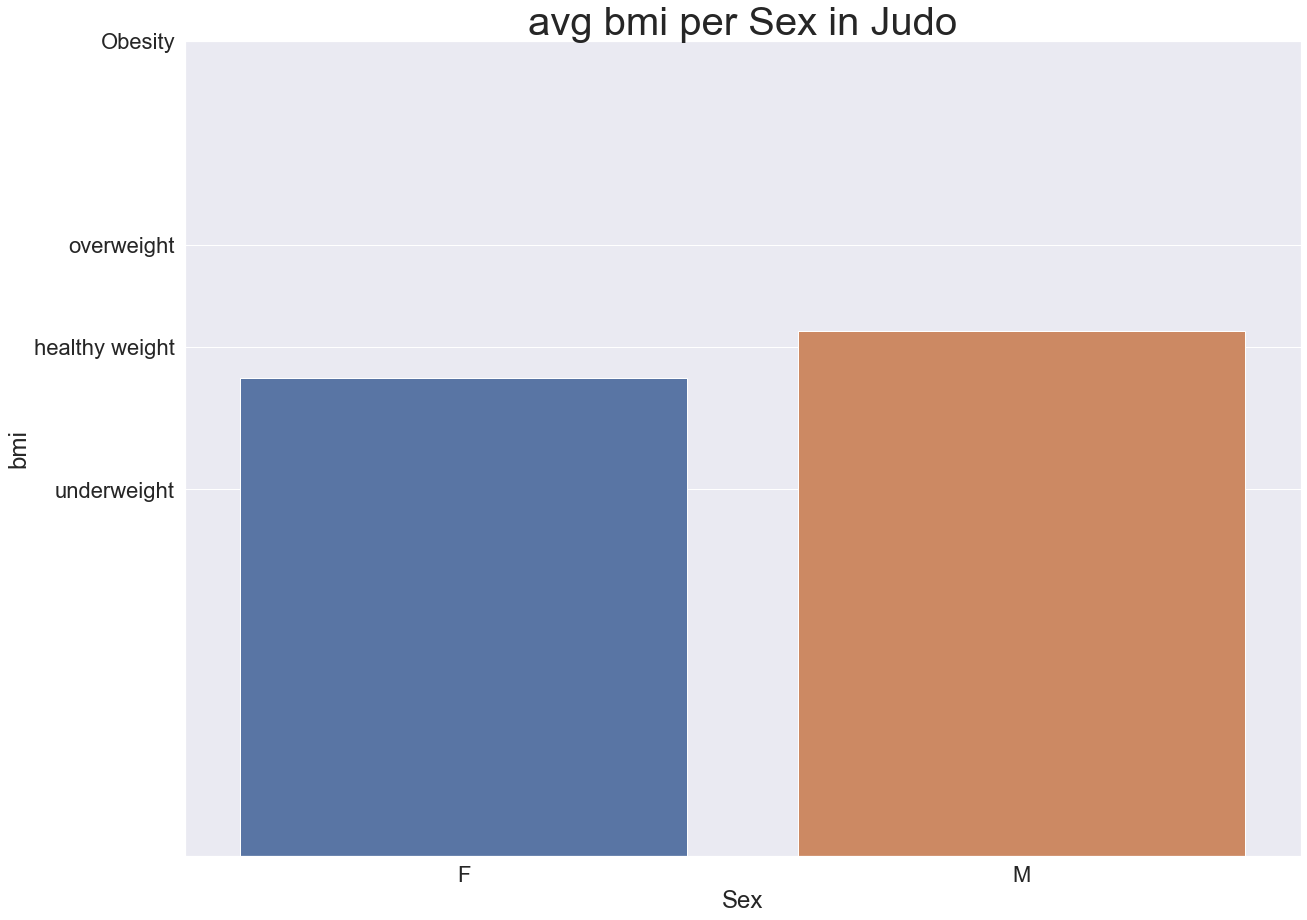

In [32]:
avg_value_per_topic("Sex","bmi",bmi_judo_players,"in Judo")

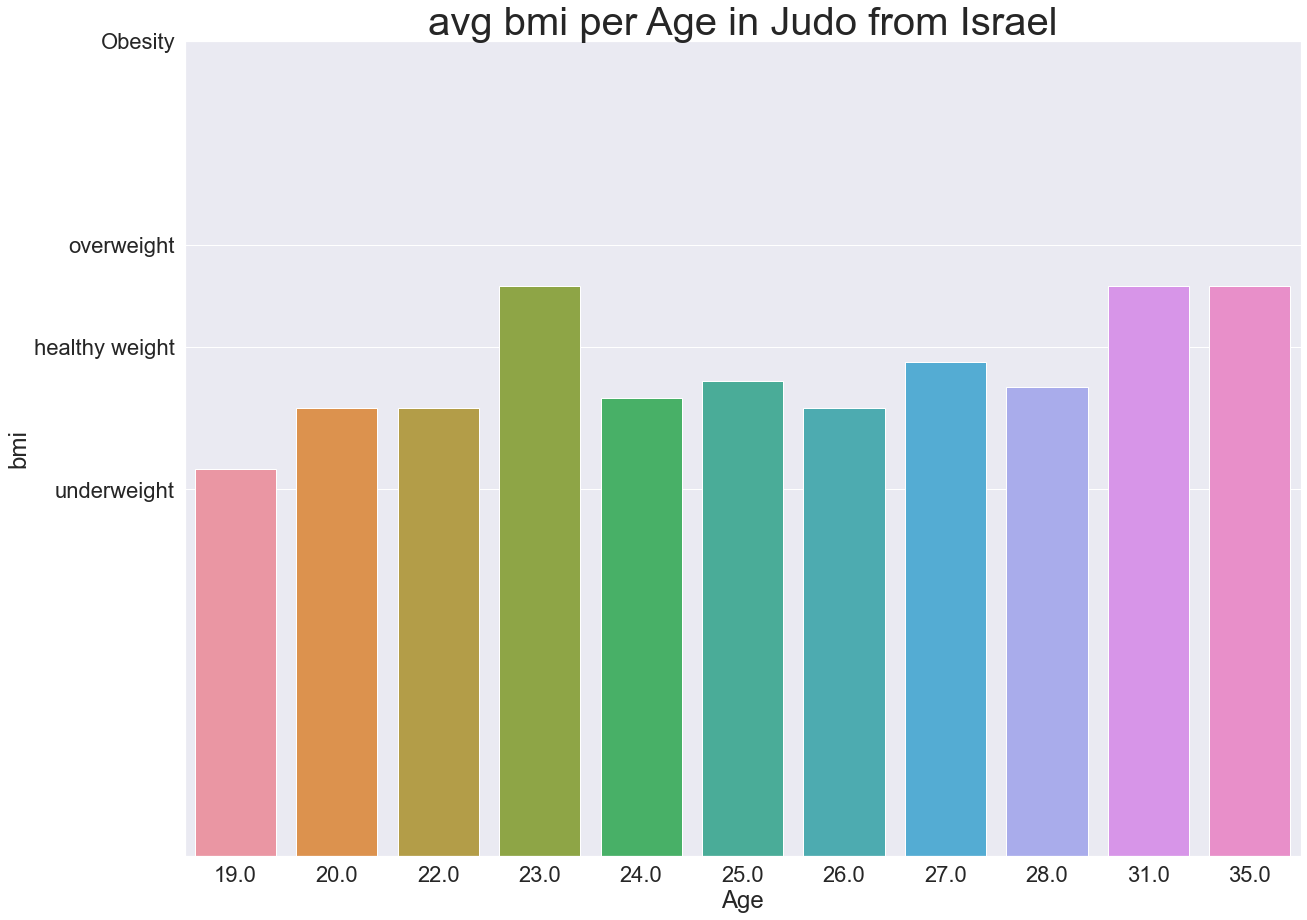

In [33]:
bmi_judo_players_Israel = bmi_judo_players.loc[bmi_judo_players["region"] == "Israel"]
avg_value_per_topic("Age","bmi",bmi_judo_players_Israel,"in Judo from Israel")

Text(0.5, 1.0, 'bmi precentage per countries with minimum one medal of each of the 3')

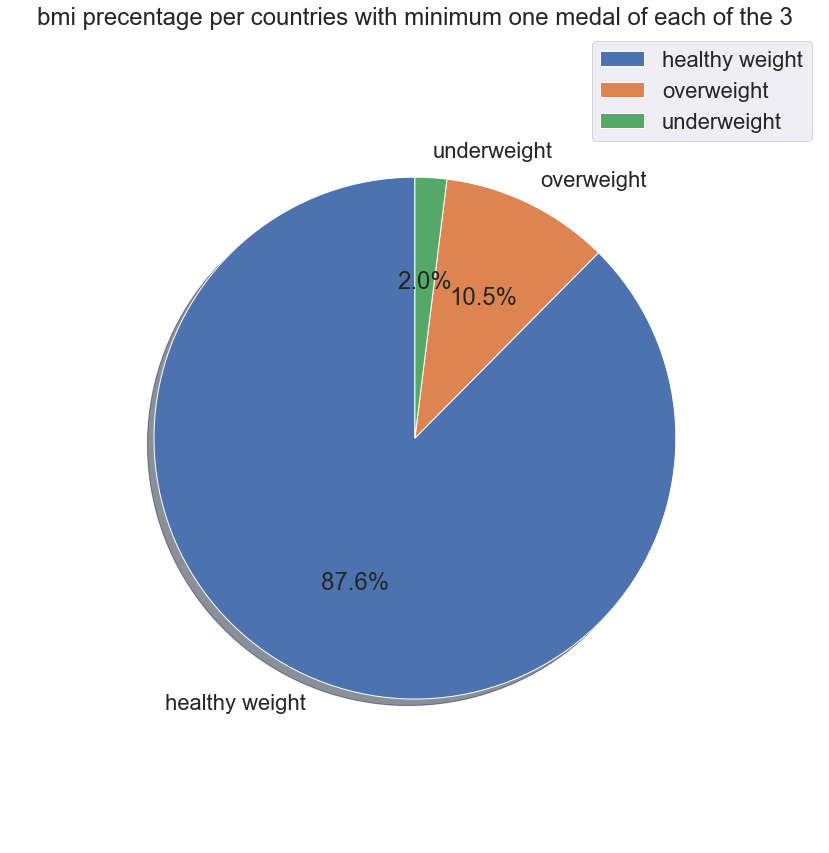

In [34]:
pivot_for_Sport = pd.pivot_table(bmi_cols_Medal,values="bmi",index="Sport",columns="Medal", aggfunc=np.mean)
pivot_for_Sport.dropna(inplace=True)
pivot_for_Sport = pivot_for_Sport.astype(int)
pivot_for_Sport = pivot_for_Sport.replace({"Bronze":weight_status,"Silver":weight_status,"Gold":weight_status})


gold = pivot_for_Sport["Gold"].value_counts()
bronze = pivot_for_Sport["Bronze"].value_counts()
silver = pivot_for_Sport["Silver"].value_counts()
all_together = (gold + bronze + silver).to_dict()
all_together_values = list(all_together.values())
all_together_labels = list(all_together.keys())


fig = plt.figure()
fig
plt.pie(all_together_values, labels = all_together_labels,
        startangle=90, shadow = True,
        radius = 0.8, autopct = '%1.1f%%')
plt.legend()
plt.title("bmi precentage per countries with minimum one medal of each of the 3")
  